<a href="https://colab.research.google.com/github/venkatesh010196/classification_titanicdata/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your dataset on Google Drive
train_file_path = '/content/drive/MyDrive/Colab Notebooks/titanic/train.csv'
test_file_path = '/content/drive/MyDrive/Colab Notebooks/titanic/test.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle


In [ ]:
df_test = pd.read_csv(test_file_path)
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train = pd.read_csv(train_file_path)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

label = df_train['Survived']
df_train = df_train.drop('Survived',axis = 1)

df = df_train.append(df_test)
df.head()


#Data Exploration and visualization

Displaying survived vs not survived per gender

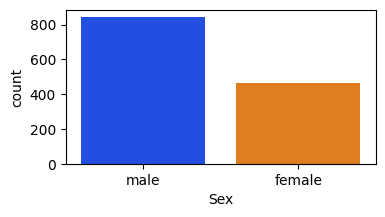

In [ ]:
plt.figure(figsize=(4, 2))
sb.countplot(x=df['Sex'],palette='bright')
plt.show()

Displaying survived vs not survived

In [ ]:
print(df.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


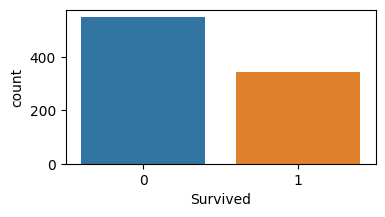

In [ ]:
plt.figure(figsize=(4, 2))
sb.countplot(x=label)

plt.show()

51.75866823917411
33.29547928134557


<Axes: ylabel='Frequency'>

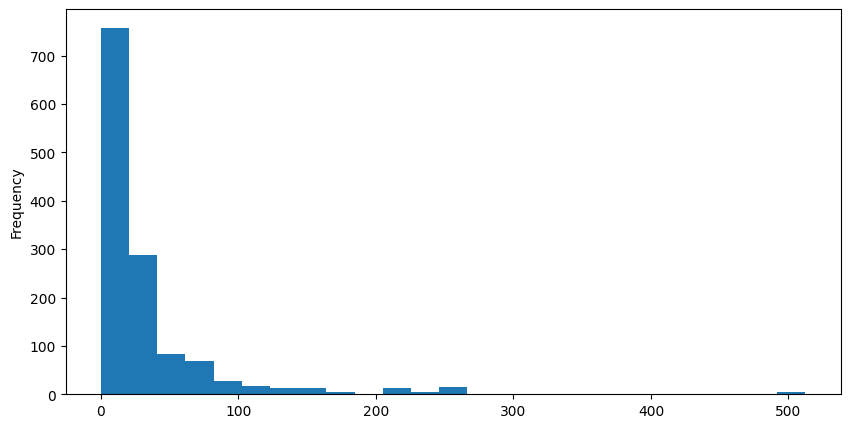

In [ ]:
from numpy.core.fromnumeric import mean
fare_std = df['Fare'].std()
mean = df['Fare'].mean()
print(fare_std)
print(mean)

df['Fare'].plot.hist(bins=25, figsize=(10,5))

siblings, spouses aboard

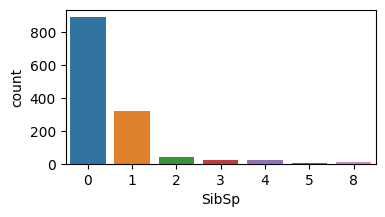

In [ ]:
plt.figure(figsize=(4, 2))
sb.countplot(x='SibSp', data=df)
plt.show()

parents, childeren aboard

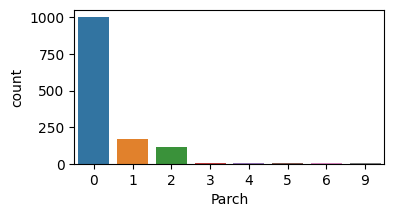

In [ ]:
plt.figure(figsize=(4, 2))
sb.countplot(x='Parch' ,data=df)
plt.show()

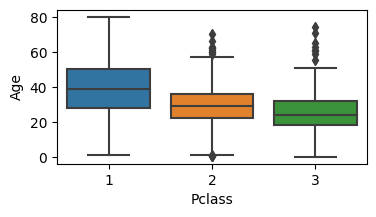

In [ ]:
plt.figure(figsize=(4, 2))
sb.boxplot(x='Pclass', y='Age', data=df)
plt.show()

#Data pre-processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


Handling missing values

In [ ]:
print(df.isnull().sum())


PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [ ]:
df.drop(['Age', 'Cabin'], axis = 1, inplace = True)


In [ ]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

filling the missing values in embarked with the value of the attribute in the last record

In [ ]:
df['Embarked'] = df['Embarked'].fillna(method = 'ffill')

checking for any missing values

In [ ]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Dropping name, ticket and passengerid from df as they dont corrrelate with other attibutes; which do not help in predicting the output.

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(5, 4))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

In [ ]:
df['Sex'].unique()
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Encoding the nominal attributes using one-hot encoding

In [ ]:
embarked_onehot = pd.get_dummies(df.Embarked)
df = pd.concat([df,embarked_onehot], axis=1)
df = df.drop("Embarked", axis=1)

sex_onehot= pd.get_dummies(df.Sex)
df = pd.concat([df,sex_onehot], axis=1)
df = df.drop("Sex", axis=1)

In [ ]:
df.head()


,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,1,0,7.2500,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0
2,3,0,0,7.9250,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0
4,3,0,0,8.0500,0,0,1,0,1


In [ ]:
df.shape

(1309, 9)

In [ ]:
train_data = df.iloc[:891,]
test_data = df.iloc[891:,]

#Experimenting with various classification models and hyper_parameters and analysing the results


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

import joblib


In [ ]:
estimators = {
    'Logisitic_Regression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(gamma = 'auto'),
    'GaussianNB': GaussianNB(),
    'XGBoost': XGBClassifier()
}


Stratified Kfold with 10 splits

In [ ]:
best_accuracy = 0.0
for name, code in estimators.items():
    kfold = StratifiedKFold(n_splits=10, random_state=11, shuffle=True)
    cv_result = cross_val_score(code, X=train_data, y=label, cv=kfold, scoring='accuracy')

    mean_accuracy = cv_result.mean()
    std_deviation = cv_result.std()

    print(f'{name:>20}: ' +
          f'mean accuracy={mean_accuracy:.2%}; ' +
          f'standard deviation={std_deviation:.2%}')

    # Check if the current model has a better accuracy
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = code
print(f'best_accuracy is {best_accuracy}')
model = best_model
model.fit(train_data, label)

# Save the trained model to a pickle file
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Make predictions on the test data
predictions = model.predict(test_data)

# Create a DataFrame with the predictions
result_df = pd.DataFrame({'PassengerId': range(892, 892 + len(predictions)), 'Survived': predictions})

# Save the DataFrame to a CSV file
result_df.to_csv('predictions.csv', index=False)


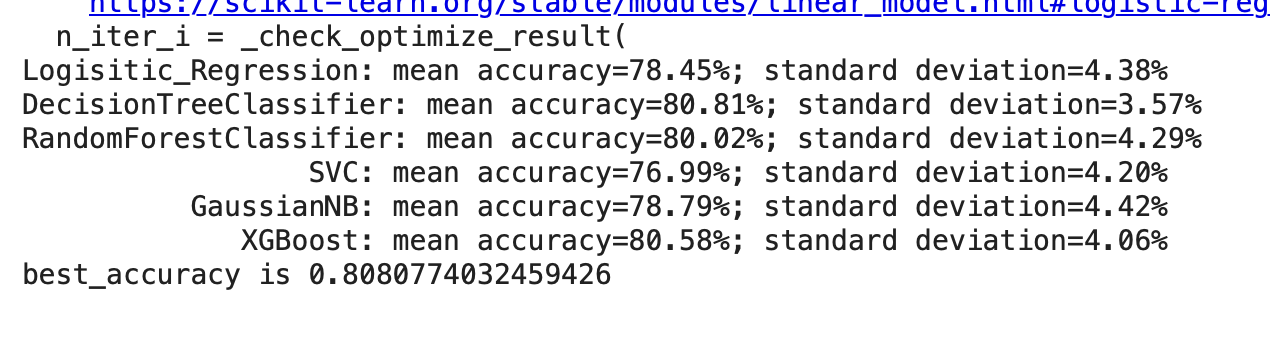

Stratified Kfold with 5 splits

In [ ]:
best_accuracy = 0.0
for name, code in estimators.items():
    kfold = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)
    cv_result = cross_val_score(code, X=train_data, y=label, cv=kfold, scoring='accuracy')

    mean_accuracy = cv_result.mean()
    std_deviation = cv_result.std()

    print(f'{name:>20}: ' +
          f'mean accuracy={mean_accuracy:.2%}; ' +
          f'standard deviation={std_deviation:.2%}')

    # Check if the current model has a better accuracy
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = code
print(f'best_accuracy is {best_accuracy}')
model = best_model
model.fit(train_data, label)

# Save the trained model to a pickle file
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Make predictions on the test data
predictions = model.predict(test_data)

# Create a DataFrame with the predictions
result_df = pd.DataFrame({'PassengerId': range(892, 892 + len(predictions)), 'Survived': predictions})

# Save the DataFrame to a CSV file
result_df.to_csv('predictions.csv', index=False)


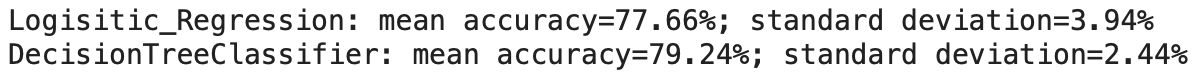

References: https://www.kaggle.com/code/olanrewajurasheed/titanic-dataset-with-gradient-boosting

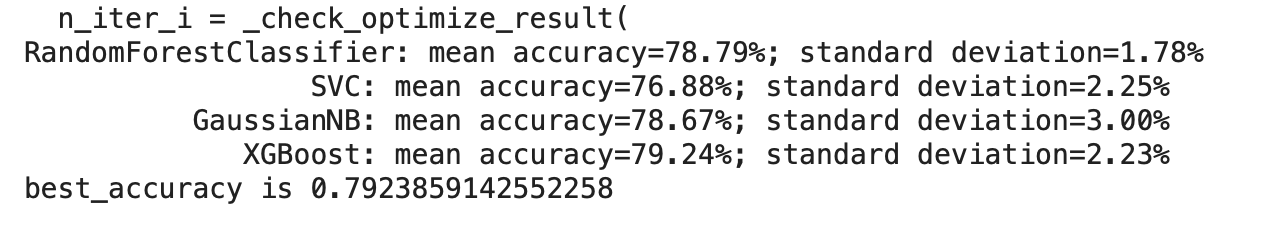

Accuracy score of predictions on test dataset in kaggle for the best model(Decision tree classifier, splits = 10)

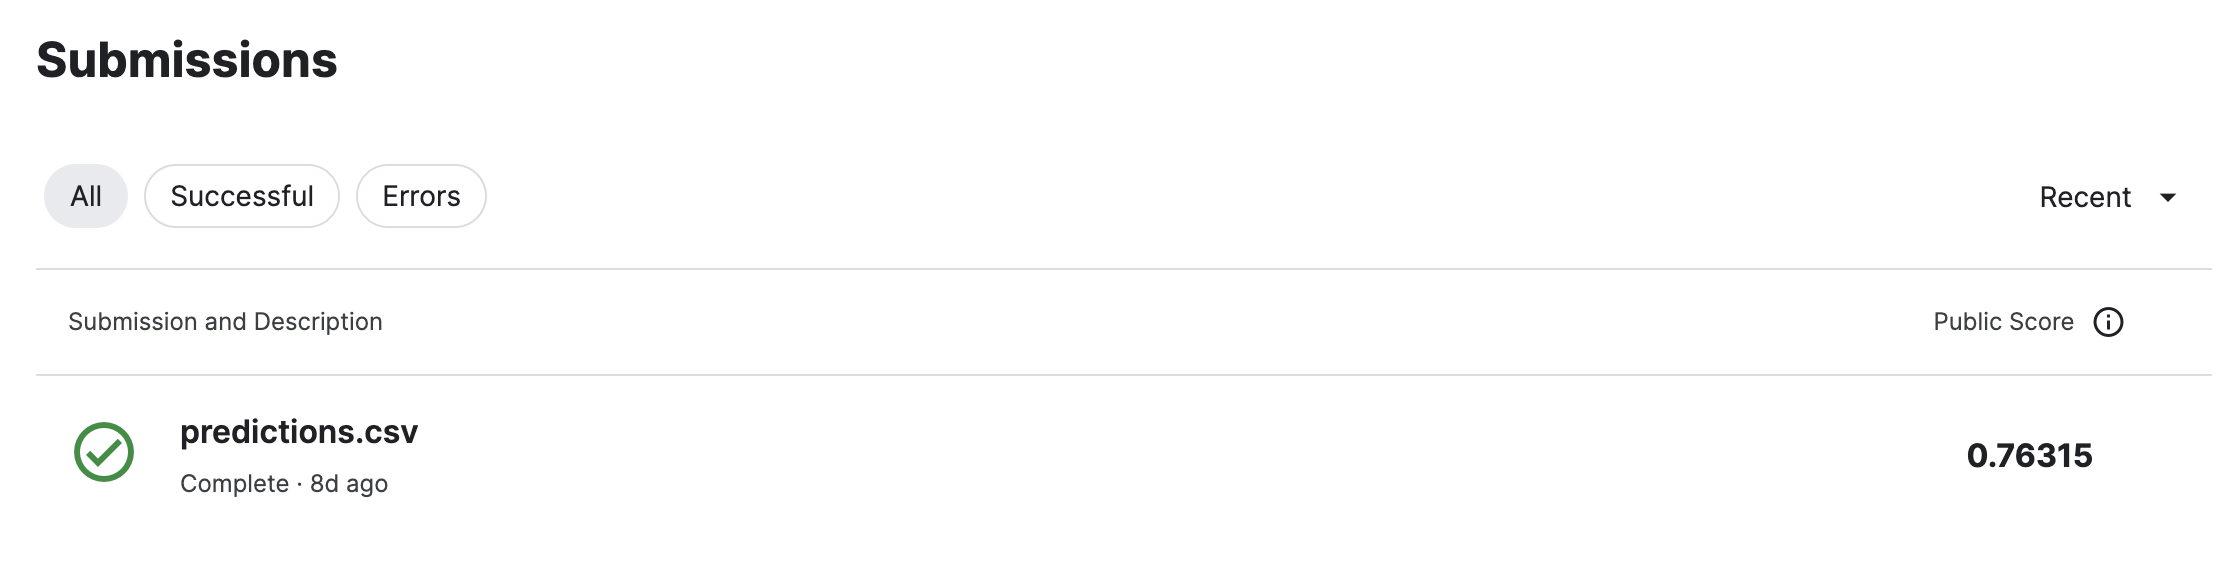